House Price Prediction
Algorithms Used:
1.XGBoost
2.Random Forest
XGBoost = Boosting Model
Random Forest = Bagging Model

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

In [2]:
data = fetch_california_housing()
X,y= data.data,data.target


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=47, test_size= 0.2)

In [3]:
# Enter your code here
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))


Number of Observations: 20640
Number of Features: 8


In [4]:
df = pd.DataFrame(data.data, columns= data.feature_names)

df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
n_estimators = 100

rf = RandomForestRegressor(n_estimators = n_estimators ,random_state=42)
xgb = XGBRegressor(n_estimators = n_estimators, random_state =42)

In [6]:
start_time= time.time()
rf.fit(X_train,y_train)
rf_time= time.time()- start_time

print(f" random forest training time: {rf_time:.2f} seconds")


start_time = time.time()
xgb.fit(X_train,y_train)
xgb_time =time.time() - start_time
print(f"XGB training time :{xgb_time: .2f} seconds")

 random forest training time: 11.97 seconds
XGB training time : 0.16 seconds


In [8]:
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

In [9]:
rf_mse = mean_squared_error(y_test, rf_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"Random Forest MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")
print(f"XGBoost MSE: {xgb_mse:.4f}, R²: {xgb_r2:.4f}")

Random Forest MSE: 0.2487, R²: 0.8175
XGBoost MSE: 0.2197, R²: 0.8388


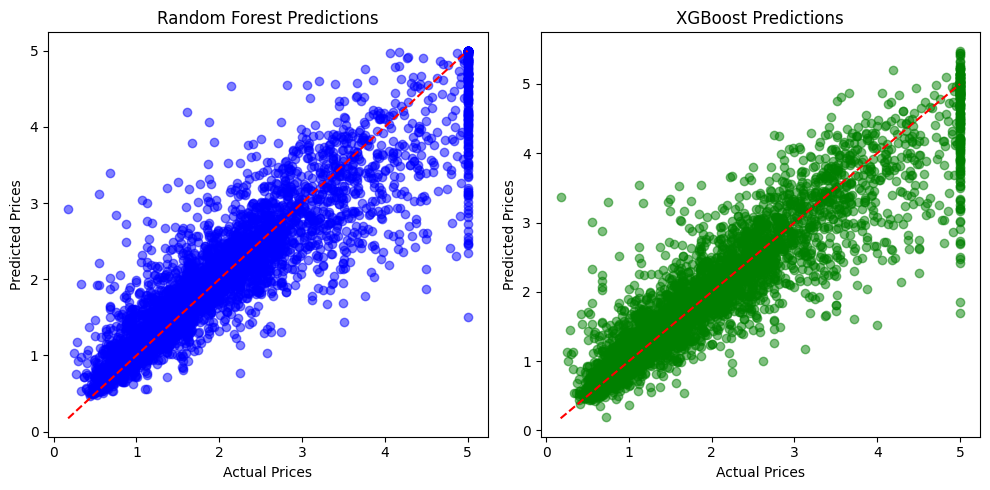

In [10]:
plt.figure(figsize=(10, 5))

# Plot Actual vs Predictions for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Predictions")

# Plot Actual vs Predictions for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost Predictions")

plt.tight_layout()
plt.show()

In [24]:
df = pd.read_csv("Datasets//Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df['mainroad'] = df['mainroad'].map({'yes':1,'no':0}).astype(int)

In [30]:
df[['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = (
    df[['guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]
    .replace({'yes': 1, 'no': 0})
    .infer_objects(copy=False)  # Explicitly retain object inference
    .astype(int)  # Ensure conversion to integer
)

In [33]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])


In [41]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [42]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [43]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


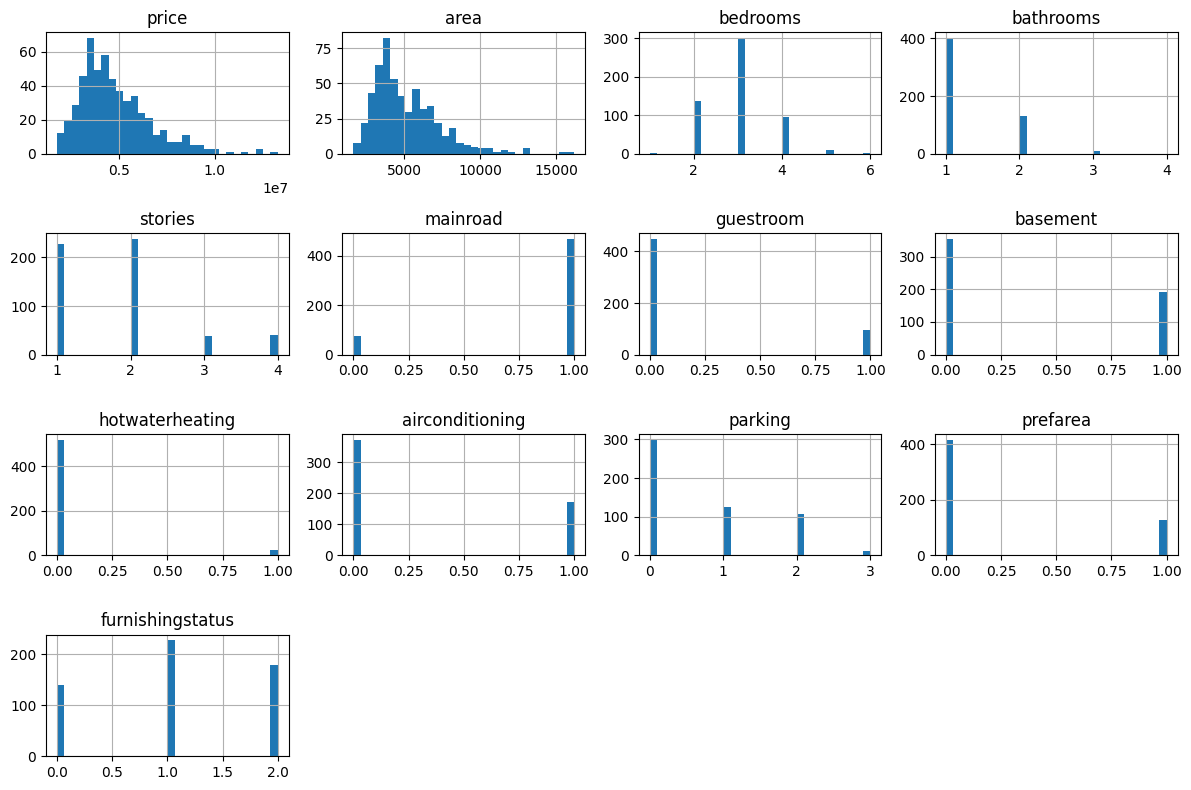

In [44]:
df.hist(figsize=(12,8),bins=30)
plt.tight_layout()
plt.show()

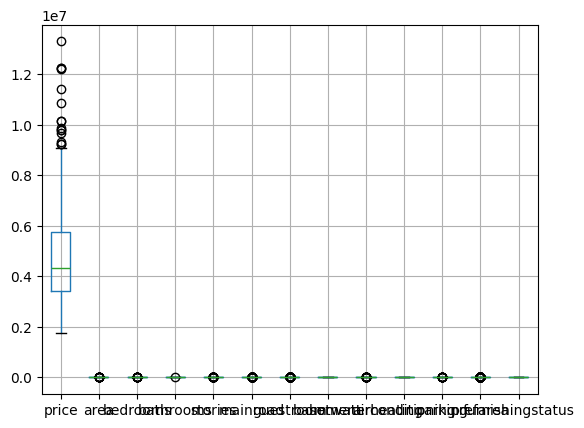

In [45]:
df.boxplot()
plt.show()

In [46]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(df)

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.51769249,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  2.67940935,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  1.51769249,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.80574124,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.80574124,
        -0.55403469,  1.22296203]])

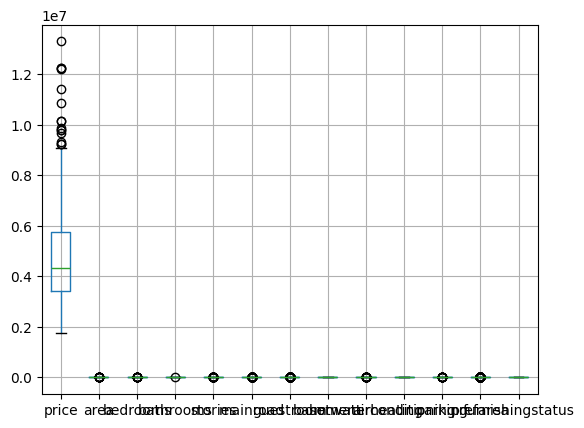

In [74]:
df.boxplot()
plt.show()

In [51]:
X1 = df.drop(columns=['price'])
y1 = df['price']

In [52]:
X_train1,X_test1,y_train1,y_test1 =train_test_split(X1,y1,test_size= 0.2,random_state= 47)

In [53]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression()

In [58]:
y_pred1 = model.predict(X_test1)

In [59]:
mse_score = mean_squared_error(y_test1,y_pred1)
r2_score1 = r2_score(y_test1,y_pred1)

In [60]:
print(f"mean squared error is : {mse_score}")
print(f"r2 score is : {r2_score1}")

mean squared error is : 1112407739873.4385
r2 score is : 0.7345959834928371


In [68]:
n_estimators = 100

rf1 = RandomForestRegressor(n_estimators = n_estimators ,random_state=42)
xgb1 = XGBRegressor(n_estimators = n_estimators, random_state =42)

In [69]:
start_time = time.time()
rf1.fit(X_train1,y_train1)
rf_time = time.time()- start_time
print(f"random forest time : {rf_time:.2f} seconds")

start_time = time.time()
xgb1.fit(X_train1,y_train1)
xgb_time = time.time() - start_time
print(f"XGB time is : {xgb_time :.2f} seconds")

random forest time : 0.17 seconds
XGB time is : 0.07 seconds


In [70]:
rf_pred = rf.predict(X_test1)
xgb_pred = xgb.predict(X_test1)

In [71]:
rf_mse = mean_squared_error(y_test1, rf_pred)
xgb_mse = mean_squared_error(y_test1, xgb_pred)

rf_r2 = r2_score(y_test1, rf_pred)
xgb_r2 = r2_score(y_test1, xgb_pred)

print(f"Random Forest MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")
print(f"XGBoost MSE: {xgb_mse:.4f}, R²: {xgb_r2:.4f}")

Random Forest MSE: 1548798864901.2153, R²: 0.6305
XGBoost MSE: 1916278276096.0000, R²: 0.5428


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model on training data
rf_random.fit(X_train1, y_train1)

# Get the best model
best_rf = rf_random.best_estimator_

# Predict on test data
y_pred_rf = best_rf.predict(X_test1)

# Evaluate performance
mse_rf = mean_squared_error(y_test1, y_pred_rf)
r2_rf = r2_score(y_test1, y_pred_rf)

# Print results
print("Best Parameters:", rf_random.best_params_)
print(f"Random Forest - R² Score: {r2_rf:.4f}")
print(f"Random Forest - RMSE: {np.sqrt(mse_rf):,.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest - R² Score: 0.6298
Random Forest - RMSE: 1,245,722.16
